In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/home/apprenant/taxi_NYC/Data/02_processed/cleaned_data.csv').sample(20000)

## Modèle de régression linéaire univarié

### 1. Modèlisation

In [2]:
# Sélection de la variable cible et des variables à explicatives
X = df[['distance']]
y = df[['trip_duration']]

In [3]:
# Division du jeu de données en training/validation/testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

/home/apprenant/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
# Apprentissage sur le training set
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)
model_uni = linear_model.LinearRegression().fit(xtrain, ytrain)

In [5]:
df['predict_uni'] = pd.DataFrame(model_uni.predict(df[['distance']]))

print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(np.round(regr.coef_[0][0],2),np.round(regr.intercept_[0])))

print("\n")

print("On comprend donc que la durée est de {}s auquel il faut ajouter {}s par trajet"
     .format(np.round(regr.intercept_[0]),np.round(regr.coef_[0][0],2)))

Le coefficient β1 est égal à 129.68 tandis que l'intercept β0 est égal à 303.0


On comprend donc que la durée est de 303.0s auquel il faut ajouter 129.68s par trajet


In [6]:
# Test de la prédiction sur une valeur précise
x_to_predict = 1.5
x_df =  pd.DataFrame({'trip_duration': [x_to_predict]})

print("Selon le modèle, pour une distance de {} km à NYC temps de trajet serait de {} s"
      .format(x_to_predict, round(regr.predict(x_df)[0][0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,np.round(regr.coef_[0][0],2),np.round(regr.intercept_[0]),
               x_to_predict*np.round(regr.coef_[0][0],2)+np.round(regr.intercept_[0])))

Selon le modèle, pour une distance de 1.5 km à NYC temps de trajet serait de 497.0 s


On remarque que 1.5 * 129.68 + 303.0 = 497.52


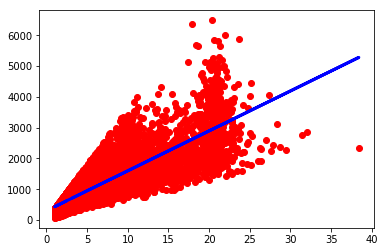

In [7]:
# Visualisation de la prédiction sous forme de regplot
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)
plt.show()

### Évaluation du modèle sur le testing set

In [8]:
# Calcul du coefficient de détermination
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.727 alors que pour les données de test, il est de 0.736


In [9]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'